In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\pavel\\OneDrive\\Desktop\\fifa data for ML.csv")

### FIFA ratings can be affected by position of the player too. There are around 1500 goalkeepers in the dataset and rest are outfield players. We cannot predict the rating of an outfield player based on his GK skills. So this dataset is for outfield players (excluding goalkeepers).

### Rating of players is mostly based on the skills of the players, there are around 35 attributes on whcih FIFA try to predict Overall Rating of a Player

### Also players international reputation also plays a crucial role as based on stars ( 1 to 5) players recieve certain rating too ( for eg - a player with 1 or 2 stars wont get any points. A player with 5 stars and rating above 75 will get 3 rating points)  

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,OVA,Nationality,Club,BP,POT,Crossing,...,Composure,Marking,Standing Tackle,Sliding Tackle,PAC,SHO,PAS,DRI,DEF,PHY
0,752,158023,L. Messi,33,93,Argentina,FC Barcelona,RW,93,85,...,96.0,32,35,24.0,85,92,91,95,38,65
1,142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,92,84,...,95.0,28,32,24.0,89,93,81,89,35,77
2,2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,CAM,91,94,...,91.0,68,65,53.0,76,86,93,88,64,78
3,2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,ST,91,71,...,88.0,35,42,19.0,78,91,78,85,43,82
4,2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,91,85,...,93.0,35,30,29.0,91,85,86,94,36,59


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.isnull().sum()

ID                    0
Name                  0
Age                   0
OVA                   0
Nationality           0
Club                 20
BP                    0
POT                   0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              54
Dribbling             0
Curve                54
FK Accuracy           0
Long Passing          0
Ball Control          0
Acceleration          0
Sprint Speed          0
Agility              54
Reactions             0
Balance              54
Shot Power            0
Jumping              54
Stamina               0
Strength              0
Long Shots            0
Aggression            0
Interceptions         5
Positioning           5
Vision               54
Penalties             0
Composure           389
Marking               0
Standing Tackle       0
Sliding Tackle       54
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF             

#### There are null values in numerical columns, to ignore information loss we will fill null values with mean values of columns

In [6]:
numerical_columns = df.select_dtypes(include='number').columns

In [7]:
df[numerical_columns]=df[numerical_columns].fillna(df.mean())

C:\Users\pavel\AppData\Local\Temp\ipykernel_38492\227110125.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[numerical_columns]=df[numerical_columns].fillna(df.mean())


In [8]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
OVA                  0
Nationality          0
Club                20
BP                   0
POT                  0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys              0
Dribbling            0
Curve                0
FK Accuracy          0
Long Passing         0
Ball Control         0
Acceleration         0
Sprint Speed         0
Agility              0
Reactions            0
Balance              0
Shot Power           0
Jumping              0
Stamina              0
Strength             0
Long Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
Standing Tackle      0
Sliding Tackle       0
PAC                  0
SHO                  0
PAS                  0
DRI                  0
DEF                  0
PHY                  0
dtype: int6

In [9]:
df['BP'].unique()

array(['RW', 'ST', 'CAM', 'LW', 'CB', 'CDM', 'CF', 'CM', 'RWB', 'RB',
       'LB', 'LM', 'RM', 'LWB'], dtype=object)

#### Dropping unnecessary columns

In [10]:
df =df.drop(['ID','Name','Age','Nationality','Club'],axis=1)

In [11]:
df=df.drop('BP',axis=1)

In [12]:
df.head()

,OVA,POT,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,...,Composure,Marking,Standing Tackle,Sliding Tackle,PAC,SHO,PAS,DRI,DEF,PHY
0,93,93,85,95,70,91,88.0,96,93.0,94,...,96.0,32,35,24.0,85,92,91,95,38,65
1,92,92,84,95,90,82,86.0,88,81.0,76,...,95.0,28,32,24.0,89,93,81,89,35,77
2,91,91,94,82,55,94,82.0,88,85.0,83,...,91.0,68,65,53.0,76,86,93,88,64,78
3,91,91,71,94,85,84,89.0,85,79.0,85,...,88.0,35,42,19.0,78,91,78,85,43,82
4,91,91,85,87,62,87,87.0,95,88.0,89,...,93.0,35,30,29.0,91,85,86,94,36,59


In [13]:
df = df.astype(int)

In [14]:
df.corr()

,OVA,POT,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,...,Composure,Marking,Standing Tackle,Sliding Tackle,PAC,SHO,PAS,DRI,DEF,PHY
OVA,1.000000,0.582392,0.533251,0.380244,0.459383,0.767208,0.452589,0.558652,0.515659,0.454671,...,0.792996,0.338198,0.279706,0.241440,0.143446,0.485557,0.707503,0.625702,0.343440,0.504178
POT,0.582392,1.000000,0.269740,0.202904,0.178972,0.466814,0.206250,0.399263,0.267478,0.188503,...,0.404633,0.159820,0.150231,0.137036,0.229753,0.239555,0.396398,0.433621,0.165927,0.119655
Crossing,0.533251,0.269740,1.000000,0.423320,-0.125626,0.626218,0.470744,0.721834,0.722812,0.622147,...,0.477482,0.103390,0.089276,0.080260,0.390706,0.507228,0.836477,0.746034,0.093416,0.004378
Finishing,0.380244,0.202904,0.423320,1.000000,0.015033,0.398979,0.829340,0.710180,0.626562,0.554096,...,0.438057,-0.498397,-0.547529,-0.576000,0.330131,0.963298,0.531502,0.705818,-0.525864,-0.080354
Heading Accuracy,0.459383,0.178972,-0.125626,0.015033,1.000000,0.176736,0.086325,-0.107168,-0.079158,-0.074988,...,0.340022,0.285206,0.251931,0.230212,-0.303078,0.066720,0.011119,-0.090147,0.340576,0.637924
Short Passing,0.767208,0.466814,0.626218,0.398979,0.176736,1.000000,0.464290,0.641328,0.608891,0.579099,...,0.702329,0.298836,0.271068,0.235843,0.097913,0.513193,0.906859,0.706375,0.301977,0.267811
Volleys,0.452589,0.206250,0.470744,0.829340,0.086325,0.464290,1.000000,0.674518,0.698347,0.624770,...,0.524978,-0.361536,-0.408859,-0.439704,0.245577,0.880511,0.591241,0.683964,-0.381277,-0.008412
Dribbling,0.558652,0.399263,0.721834,0.710180,-0.107168,0.641328,0.674518,1.000000,0.744075,0.608382,...,0.549697,-0.188195,-0.219785,-0.235919,0.494235,0.757677,0.779932,0.978824,-0.211116,-0.067201
Curve,0.515659,0.267478,0.722812,0.626562,-0.079158,0.608891,0.698347,0.744075,1.000000,0.785668,...,0.563814,-0.091950,-0.120201,-0.142912,0.297446,0.718148,0.800016,0.766282,-0.109116,-0.027511
FK Accuracy,0.454671,0.188503,0.622147,0.554096,-0.074988,0.579099,0.624770,0.608382,0.785668,1.000000,...,0.508300,-0.044942,-0.060918,-0.088948,0.150896,0.657916,0.753752,0.635026,-0.053330,-0.011997


#### The relationship between dependent and independent variables is not fully linear 

In [21]:
X= df.drop('OVA',axis=1)
### we will have 36 attributes for prediction

In [22]:
Y= df['OVA']

In [23]:
X

,POT,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,...,Composure,Marking,Standing Tackle,Sliding Tackle,PAC,SHO,PAS,DRI,DEF,PHY
0,93,85,95,70,91,88,96,93,94,91,...,96,32,35,24,85,92,91,95,38,65
1,92,84,95,90,82,86,88,81,76,77,...,95,28,32,24,89,93,81,89,35,77
2,91,94,82,55,94,82,88,85,83,93,...,91,68,65,53,76,86,93,88,64,78
3,91,71,94,85,84,89,85,79,85,70,...,88,35,42,19,78,91,78,85,43,82
4,91,85,87,62,87,87,95,88,89,81,...,93,35,30,29,91,85,86,94,36,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15544,57,45,52,34,42,42,51,35,31,31,...,45,26,32,42,58,49,41,49,30,44
15545,55,23,26,43,26,27,27,23,21,29,...,44,45,52,50,64,28,26,38,48,51
15546,47,44,32,44,56,35,46,37,33,56,...,35,38,43,45,65,37,49,46,40,59
15547,62,28,28,31,57,48,52,53,29,47,...,61,21,24,49,46,28,44,51,24,36


In [24]:
Y

0        93
1        92
2        91
3        91
4        91
         ..
15544    47
15545    47
15546    47
15547    42
15548    38
Name: OVA, Length: 15549, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## We will be training the data based on 2 algorithms, Lasso regression and Gradient Boosting Regressor and compare the accuracy of the models. 
### These two algorithms work best for high-dimensionality dataset.

#### Lasso Regression - Though are dependent variables are on the same scale but we will still Feature Scale our attributes to ensure that the model generalizes well to unseen data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [45]:
lasso = Lasso()

In [46]:
param_grid = {'alpha': [0.01,0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

In [53]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]},
             scoring='neg_mean_squared_error')

In [54]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'alpha': 0.01}
Best Score: 4.5996927161613455


In [55]:
best_alpha = grid_search.best_params_['alpha']

In [56]:
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [57]:
y_pred = lasso_best.predict(X_test_scaled)

In [58]:
from sklearn.metrics import mean_squared_error,r2_score

In [59]:
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error on Test Set:", mse)
print("R Squared value on Test Set:", r2)


Mean Squared Error on Test Set: 4.948008725669035
R Squared value on Test Set: 0.8924870705682397


#### We have an accuracy of 89% for are Lasso model

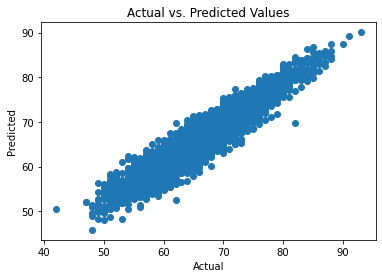

In [78]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [80]:
import joblib ## saving the model

In [83]:
joblib.dump(lasso_best, 'lasso_best_model.joblib')

['lasso_best_model.joblib']

#### Gradient Boosting Regressor - no feature scaling is required

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb_regressor = GradientBoostingRegressor()

In [62]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

In [63]:
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [65]:
best_params = grid_search.best_params_

In [66]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [70]:
gb_reg_new = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 200)

In [71]:
gb_reg_new.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [72]:
y_prd= gb_reg_new.predict(X_test)

In [73]:
mse1 = mean_squared_error(y_test, y_prd)
r2s=r2_score(y_test,y_prd)
print("Mean Squared Error on Test Set:", mse1)
print("R Squared value on Test Set:", r2s)


Mean Squared Error on Test Set: 1.0757900676178347
R Squared value on Test Set: 0.9766246690263171


# Gradient Boosting Regressor is providing 97% accuracy 
## It is better than Lasso because Gradient Boositng Regressor works well for a data with Weak Linear Relationship.

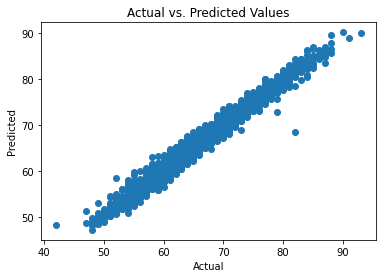

In [77]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [84]:
joblib.dump(gb_reg_new,'gb_new_mode.joblib') ## saving the model

['gb_new_mode.joblib']